In [219]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import collections

気になる論文を見つけたのでちょっと確認  
Revisiting power-law distributions in spectra of real world networks  
https://www.kdd.org/kdd2017/papers/view/revisiting-power-law-distributions-in-spectra-of-real-world-networks  

In [220]:
n=500
m=4
G=nx.barabasi_albert_graph(n,m)

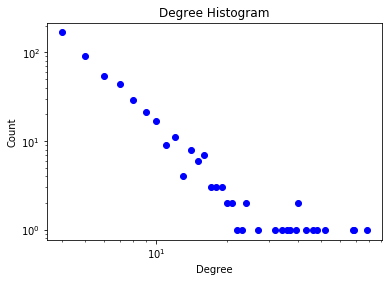

In [221]:
# Sampleコードを引用したもの、次数分布を示す(log-log)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.scatter(deg, cnt, color='b')
#plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

In [222]:
import scipy.sparse.linalg as LA
LL=nx.laplacian_matrix(G)
LL=LL.asfptype()
eig_val, eige_vec = LA.eigs(LL,k=G.number_of_nodes()-100)
#print(eig_val)
#print(type(eig_val))

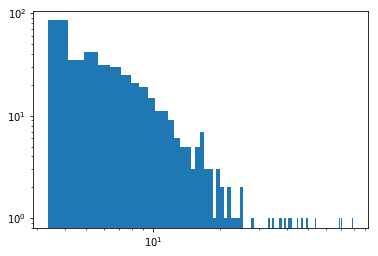

In [223]:
plt.xscale('log')
plt.yscale('log')
L=plt.hist(eig_val,bins=100)

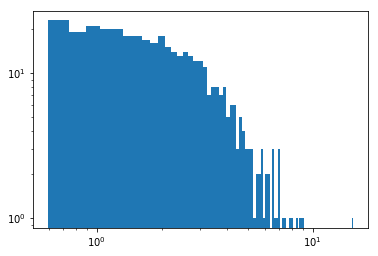

In [224]:
AA=nx.adjacency_matrix(G)
AA=AA.asfptype()
U, s, V = LA.svds( AA ,k=G.number_of_nodes()-100)
#print(U,s,V)
plt.xscale('log')
plt.yscale('log')
#print(s)
s=-(np.sort(-s))
A=plt.hist(s,bins=100)

[85. 35. 42. 31. 30. 25. 21. 19. 15. 11. 11.  9.  6.  5.  5.  3.  5.  7.
  3.  3.  1.  3.  2.  1.  2.  1.  1.  1.  2.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.  0.  1.  1.  0.  0.  0.
  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.] [ 3.74692398  4.50506339  5.26320281  6.02134222  6.77948163  7.53762104
  8.29576046  9.05389987  9.81203928 10.57017869 11.32831811 12.08645752
 12.84459693 13.60273634 14.36087575 15.11901517 15.87715458 16.63529399
 17.3934334  18.15157282 18.90971223 19.66785164 20.42599105 21.18413047
 21.94226988 22.70040929 23.4585487  24.21668812 24.97482753 25.73296694
 26.49110635 27.24924577 28.00738518 28.76552459 29.523664   30.28180342
 31.03994283 31.79808224 32.55622165 33.31436106 34.07250048 34.83063989
 35.5887793  36.34691871 37.10505813 37.86319754 38.62133695 39.37947636
 40.13761

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


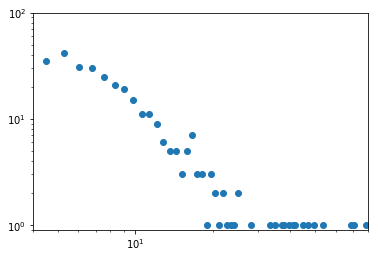

In [225]:
Lval=np.zeros(len(L[0]))
for i in range(len(L[0])):
    Lval[i]=(L[1][i]+L[1][i+1])/2.0
print(L[0],Lval)
plt.xscale('log')
plt.yscale('log')
plt.ylim([0.9,100])
plt.xlim([4,80])
plt.scatter(Lval,L[0])

[25. 23. 20. 21. 19. 22. 16. 16. 19. 17. 17. 14. 15. 12. 13. 11. 11. 11.
  7.  7.  8.  7.  5.  5.  6.  5.  4.  4.  4.  1.  4.  3.  3.  1.  2.  1.
  1.  1.  3.  1.  1.  1.  1.  2.  1.  0.  1.  2.  0.  1.  1.  0.  1.  1.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.] [ 0.67436164  0.82605778  0.97775392  1.12945005  1.28114619  1.43284232
  1.58453846  1.73623459  1.88793073  2.03962686  2.191323    2.34301913
  2.49471527  2.64641141  2.79810754  2.94980368  3.10149981  3.25319595
  3.40489208  3.55658822  3.70828435  3.85998049  4.01167662  4.16337276
  4.3150689   4.46676503  4.61846117  4.7701573   4.92185344  5.07354957
  5.22524571  5.37694184  5.52863798  5.68033411  5.83203025  5.98372639
  6.13542252  6.28711866  6.43881479  6.59051093  6.74220706  6.8939032
  7.04559933  7.19729547  7.3489916   7.50068774  7.65238388  7.80408001
  7.955776

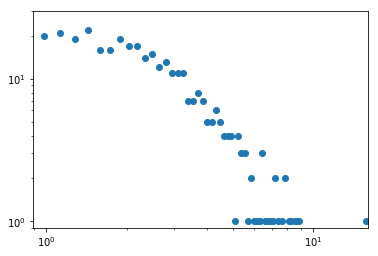

In [105]:
Aval=np.zeros(len(A[0]))
for i in range(len(A[0])):
    Aval[i]=(A[1][i]+A[1][i+1])/2.0
print(A[0],Aval)
plt.xscale('log')
plt.yscale('log')
plt.ylim([0.9,30])
plt.xlim([0,16])
plt.scatter(Aval,A[0])

In [226]:
from scipy.optimize import curve_fit

In [227]:
def powerlaw(x,a,b):
    return b*x**a

In [228]:
def R2(y_data_1,x_data,popt,func):
    residuals =  y_data_1- func(x_data, popt[0],popt[1])
    rss = np.sum(residuals**2)#residual sum of squares = rss
    tss = np.sum((y_data_1-np.mean(y_data_1))**2)#total sum of squares = tss
    r_squared = 1 - (rss / tss)
    return r_squared

FIT :: y= 6161.781173242457 x^{ -2.604944257043028 }

R2 value:: 0.9970598132894816


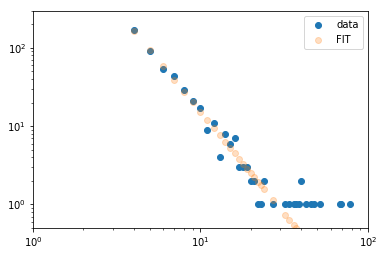

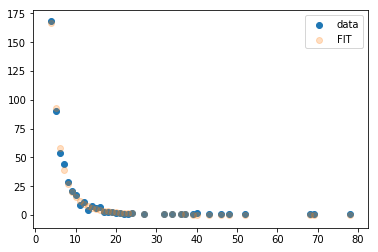

In [242]:
# fitting 
param, cov = curve_fit(powerlaw, deg, cnt)
print("FIT :: y=",param[1],"x^{",param[0],"}\n")

#print(param,cov)

deg_fit=np.zeros(len(deg))
for i in range(len(deg_fit)):
    deg_fit[i] =  param[1]*deg[i]**param[0]
#print(Lfit)

# R2 value
r2=R2(cnt,deg,param,powerlaw)
print("R2 value::",r2)

# set log-log
plt.xscale('log')
plt.yscale('log')
plt.ylim([0.5,300])
plt.xlim([1,100])
plt.scatter(deg,cnt,alpha=1.0,label='data')
plt.scatter(deg,deg_fit,alpha=0.25,label='FIT') 
plt.legend()
plt.show()
# unset logscale 
plt.scatter(deg,cnt,alpha=1.0,label='data')
plt.scatter(deg,deg_fit,alpha=0.25,label='FIT') 
plt.legend()
plt.show()

FIT :: y= 965.7705557115361 x^{ -1.9151991846412593 }

R2 value:: 0.952150594676926


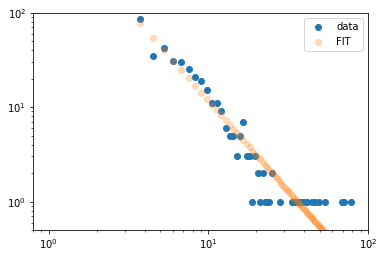

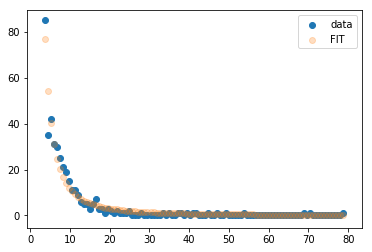

In [241]:
# fitting 
param, cov = curve_fit(powerlaw, Lval, L[0])
print("FIT :: y=",param[1],"x^{",param[0],"}\n")

Lfit=np.zeros(len(Lval))
for i in range(len(Lfit)):
    Lfit[i] =  param[1]*Lval[i]**param[0]
#print(Lfit)

# R2 value
r2=R2(L[0],Lval,param,powerlaw)
print("R2 value::",r2)

# set log-log
plt.xscale('log')
plt.yscale('log')
plt.ylim([0.5,100])
plt.xlim([0.8,100])
plt.scatter(Lval,L[0],alpha=1.0,label='data')
plt.scatter(Lval,Lfit,alpha=0.25,label='FIT') 
plt.legend()
plt.show()
# unset logscale 
plt.scatter(Lval,L[0],alpha=1.0,label='data')
plt.scatter(Lval,Lfit,alpha=0.25,label='FIT') 
plt.legend()
plt.show()

FIT :: y= 21.1434621881008 x^{ -0.9739420928306503 }

R2 value ::  0.8151869319797712


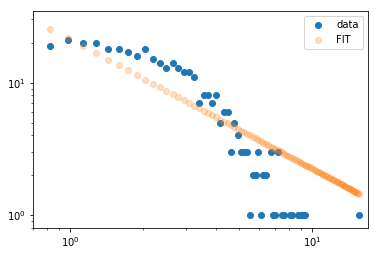

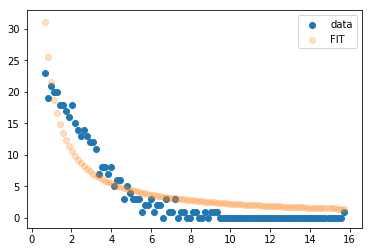

In [246]:
# fitting
param, cov = curve_fit(powerlaw, Aval, A[0])
print("FIT :: y=",param[1],"x^{",param[0],"}\n")
#print(param,cov)

Afit=np.zeros(len(Aval))
for i in range(len(Afit)):
    Afit[i] =  param[1]*Aval[i]**param[0]
#print(Afit)

# R2 values
r2=R2(A[0],Aval,param,powerlaw)
print("R2 value :: ",r2)

#
plt.xscale('log')
plt.yscale('log')
plt.ylim([0.8,35])
plt.xlim([0.7,17])
plt.scatter(Aval,A[0],alpha=1.0,label='data')
plt.scatter(Aval,Afit,alpha=0.25,label='FIT')
plt.legend()
plt.show()
#
plt.scatter(Aval,A[0],alpha=1.0,label='data')
plt.scatter(Aval,Afit,alpha=0.25,label='FIT')
plt.legend()
plt.show()